In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import io
import re

In [4]:
url = 'https://doi.pangaea.de/10.1594/PANGAEA.839953?format=textfile'

In [19]:
s=requests.get(url).content

# Find end of metadata
for row, line in enumerate(io.StringIO(s.decode('utf-8')).readlines()):
    if re.search('\*/', line): break
 
df = pd.read_csv(io.StringIO(s.decode('utf-8')), skiprows=row+1, header=0, sep='\t', 
                 index_col='Date/Time', parse_dates=True)
df.head()

,Latitude,Longitude,Snow h [m] (Sensor 1),Snow h [m] (Sensor 2),Snow h [m] (Sensor 3),Snow h [m] (Sensor 4),Snow h [m] (mean),PPPP [hPa],TTT [°C],T tech [°C]
Date/Time,,,,,,,,,,
2013-04-09 16:00:00,89.5732,-106.7712,NaN,NaN,NaN,NaN,NaN,1022.4,-24.6,-18.6
2013-04-09 17:00:00,89.5732,-106.7712,NaN,NaN,0.074,0.063,0.069,1022.3,-24.7,-17.0
2013-04-09 18:01:00,89.5688,-105.5694,NaN,NaN,0.074,0.053,0.064,1022.3,-24.7,-16.2
2013-04-09 19:00:00,89.5688,-105.5694,NaN,0.034,0.074,0.053,0.054,1022.1,-24.6,-15.6
2013-04-09 20:00:00,89.5688,-105.5694,NaN,0.034,0.074,0.053,0.054,1022.0,-24.6,-15.3


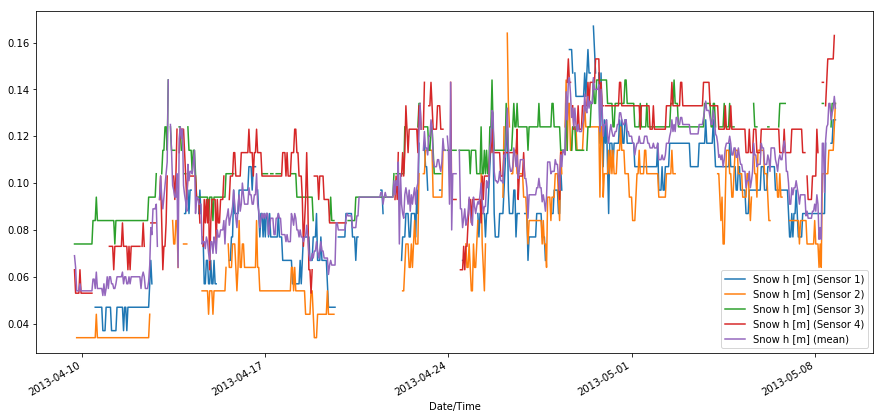

In [30]:
fig, ax = plt.subplots(figsize=(15,7))

df[['Snow h [m] (Sensor 1)',
    'Snow h [m] (Sensor 2)',
    'Snow h [m] (Sensor 3)',
    'Snow h [m] (Sensor 4)',
    'Snow h [m] (mean)']].plot(ax=ax)

In [22]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:                (Date/Time: 1556)
Coordinates:
  * Date/Time              (Date/Time) datetime64[ns] 2013-04-09T16:00:00 ...
Data variables:
    Latitude               (Date/Time) float64 89.57 89.57 89.57 89.57 89.57 ...
    Longitude              (Date/Time) float64 -106.8 -106.8 -105.6 -105.6 ...
    Snow h [m] (Sensor 1)  (Date/Time) float64 nan nan nan nan nan nan nan ...
    Snow h [m] (Sensor 2)  (Date/Time) float64 nan nan nan 0.034 0.034 0.034 ...
    Snow h [m] (Sensor 3)  (Date/Time) float64 nan 0.074 0.074 0.074 0.074 ...
    Snow h [m] (Sensor 4)  (Date/Time) float64 nan 0.063 0.053 0.053 0.053 ...
    Snow h [m] (mean)      (Date/Time) float64 nan 0.069 0.064 0.054 0.054 ...
    PPPP [hPa]             (Date/Time) float64 1.022e+03 1.022e+03 1.022e+03 ...
    TTT [°C]               (Date/Time) float64 -24.6 -24.7 -24.7 -24.6 -24.6 ...
    T tech [°C]            (Date/Time) float64 -18.6 -17.0 -16.2 -15.6 -15.3 ...

In [24]:
ds.set_coords(['Latitude', 'Longitude'], inplace=True)
ds

<xarray.Dataset>
Dimensions:                (Date/Time: 1556)
Coordinates:
  * Date/Time              (Date/Time) datetime64[ns] 2013-04-09T16:00:00 ...
    Latitude               (Date/Time) float64 89.57 89.57 89.57 89.57 89.57 ...
    Longitude              (Date/Time) float64 -106.8 -106.8 -105.6 -105.6 ...
Data variables:
    Snow h [m] (Sensor 1)  (Date/Time) float64 nan nan nan nan nan nan nan ...
    Snow h [m] (Sensor 2)  (Date/Time) float64 nan nan nan 0.034 0.034 0.034 ...
    Snow h [m] (Sensor 3)  (Date/Time) float64 nan 0.074 0.074 0.074 0.074 ...
    Snow h [m] (Sensor 4)  (Date/Time) float64 nan 0.063 0.053 0.053 0.053 ...
    Snow h [m] (mean)      (Date/Time) float64 nan 0.069 0.064 0.054 0.054 ...
    PPPP [hPa]             (Date/Time) float64 1.022e+03 1.022e+03 1.022e+03 ...
    TTT [°C]               (Date/Time) float64 -24.6 -24.7 -24.7 -24.6 -24.6 ...
    T tech [°C]            (Date/Time) float64 -18.6 -17.0 -16.2 -15.6 -15.3 ...

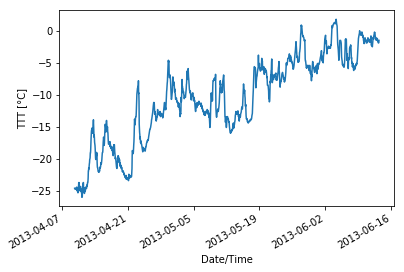

In [25]:
ds['TTT [°C]'].plot()